## Importing Data

In [245]:
import pandas as pd

cols = ["Origin", "Destination", "Origin City", "Destination City", "Passengers", "Seats", "Flights",
        "Distance", "Fly Date", "Origin Population", "Destination Population"]
dat = pd.read_csv(r"data/flight_edges.tsv", sep="\t", names=cols)
dat.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",1,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034


### Demonstration

In [246]:
dat = dat[dat["Destination"] == "JFK"]
dat.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
1666865,IND,JFK,"Indianapolis, IN","New York, NY",2229,2500,25,664.0,199005,1299152,33737966
1666866,IND,JFK,"Indianapolis, IN","New York, NY",270,321,3,664.0,199005,1299152,33737966
1666867,IND,JFK,"Indianapolis, IN","New York, NY",125,142,1,664.0,199005,1299152,33737966
1666870,IND,JFK,"Indianapolis, IN","New York, NY",71,107,1,664.0,199003,1299152,33737966
1666871,IND,JFK,"Indianapolis, IN","New York, NY",35,145,1,664.0,199008,1299152,33737966


### Indexing based on datetime objects

In [247]:
dat["Fly Date"] = pd.to_datetime(dat["Fly Date"], format="%Y%m")
dat.set_index("Fly Date", inplace=True)
dat = dat.sort_index()
dat.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Origin Population,Destination Population
Fly Date,,,,,,,,,,
1990-01-01,STL,JFK,"St. Louis, MO","New York, NY",37,115,1,892.0,2584656,33737966
1990-01-01,SFO,JFK,"San Francisco, CA","New York, NY",1501,1944,10,2586.0,7436126,33737966
1990-01-01,SFO,JFK,"San Francisco, CA","New York, NY",3388,7830,27,2586.0,7436126,33737966
1990-01-01,SFO,JFK,"San Francisco, CA","New York, NY",151,215,1,2586.0,7436126,33737966
1990-01-01,SFO,JFK,"San Francisco, CA","New York, NY",6195,15145,37,2586.0,7436126,33737966


## Cleaning the Data
### Summing together quantitative variables

In [248]:
dat = dat[["Passengers", "Seats", "Flights"]].groupby(dat.index).sum()
dat.head(12)

,Passengers,Seats,Flights
Fly Date,,,
1990-01-01,397616,756546,4154
1990-02-01,343646,667512,3686
1990-03-01,430448,735481,4092
1990-04-01,431184,681137,3769
1990-05-01,477280,742013,3954
1990-06-01,498790,744732,3991
1990-07-01,513745,806391,4281
1990-08-01,576025,808745,4289
1990-09-01,457128,735307,3886


### Demonstration

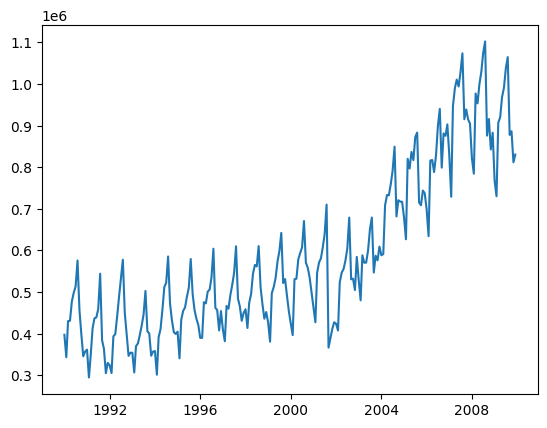

In [249]:
from matplotlib import pyplot as plt
plt.plot(dat["Passengers"])
plt.show()

## Time Series Splits

In [250]:
class seriesSplits:
    def __init__(self, dat):
        self.test = {}
        self.train = {}
        self.dat = dat
        self.models = []
    def split(self, testStart, trainStart):
        #Splits until a year, that year is included in the test set
        self.test[(trainStart, testStart)] = self.dat[testStart:].drop(["Flights", "Seats"], axis=1)
        self.train[(trainStart, testStart)] = self.dat[trainStart:str(int(testStart) - 1)].drop(["Flights", "Seats"], axis=1)
    
    def show(self, testStart, trainStart= '1990'):
        if (trainStart, testStart) not in self.test:
            self.split(testStart, trainStart)
        if len(self.models) != 0:
            figure, axis = plt.subplots(1, len(self.models))
            for index, i in enumerate(self.models):
                plt.figure(index+1)
                plt.subplot(111)
                plt.plot(self.train[(trainStart, testStart)], label = "Training Data")
                plt.plot(self.test[(trainStart, testStart)], label = "Test Data")
                plt.plot(i.forecast(self.train[(trainStart, testStart)], self.test[(trainStart, testStart)]), label="Model Forecast")
                plt.title(i.title)
                plt.legend()
                #axis[index].plot(i.forecast(self.train[(trainStart, testStart)], self.test[(trainStart, testStart)]), label="Model Forecast")
                #axis[index].set_title(i.title)
                #axis[index].legend()
        else:
            plt.figure(1)
            plt.plot(self.train[(trainStart, testStart)], label = "Training Data")
            plt.plot(self.test[(trainStart, testStart)], label = "Test Data")
            plt.title("Training from " + trainStart + "-" + testStart)
            plt.legend()
        plt.show()
        
    def addModel(self, model):
        self.models.append(model)

    
y = seriesSplits(dat)

### Demonstration

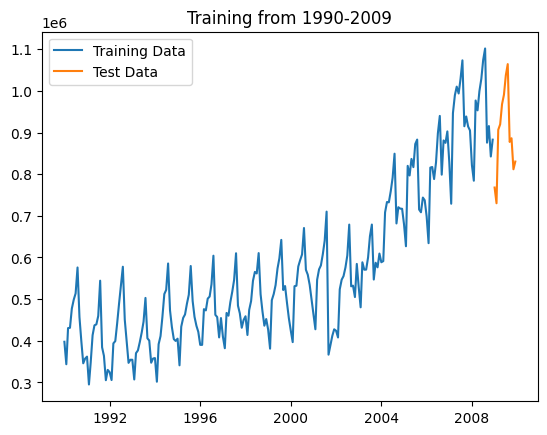

In [251]:
y.show('2009')

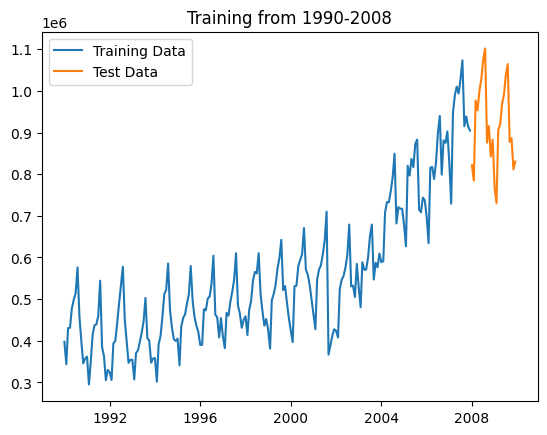

In [252]:
y.show('2008')

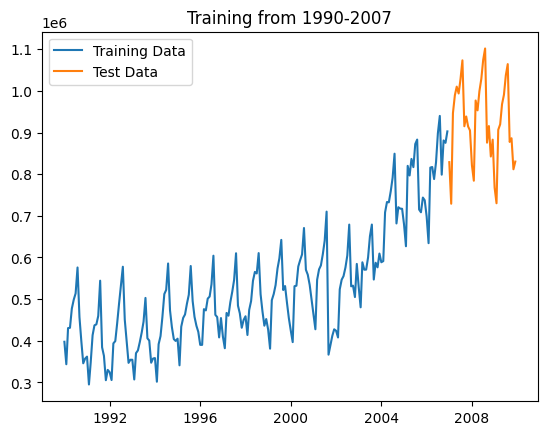

In [253]:
y.show('2007')

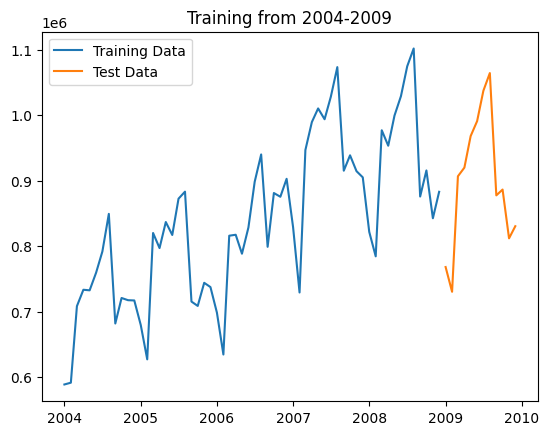

In [254]:
y.show('2009', '2004')

## Models

In [255]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.arima.model import ARIMA

import numpy as np
class modelClass:
    def __init__(self, model, title, kwargs, ts=None):
        self.title = title
        self.model = model
        self.kwargs = kwargs 
        self.ts = ts
        if ts != None:
            self.ts.addModel(self)
    
    def forecast(self, train, test):
        fore = test.copy()
        fore["forecast"] = self.model(np.asarray(train["Passengers"]), **self.kwargs).fit().forecast(len(test))
        return fore["forecast"]

modelClass(SimpleExpSmoothing, "Simple Exponential Smoothing", {}, y)
modelClass(ExponentialSmoothing, "Holt Exponential Smoothing", {"trend":"add"}, y)
modelClass(ExponentialSmoothing, "Holt-Winters Exponential Smoothing", {"trend":"add", "seasonal":"add", "seasonal_periods":12}, y)
modelClass(ETSModel, "ETS Exponential Smoothing", {"trend":"add", "seasonal":"add", "error":"add", "seasonal_periods":12}, y)
modelClass(ARIMA, "ARIMA", {"order":(12,1,0)}, y)
modelClass(ARIMA, "SARIMA", {"order":(1,1,0), "seasonal_order":(1,1,0,12)}, y)

### Demonstration

C:\Users\Dow\AppData\Local\Temp\ipykernel_22248\3466611483.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


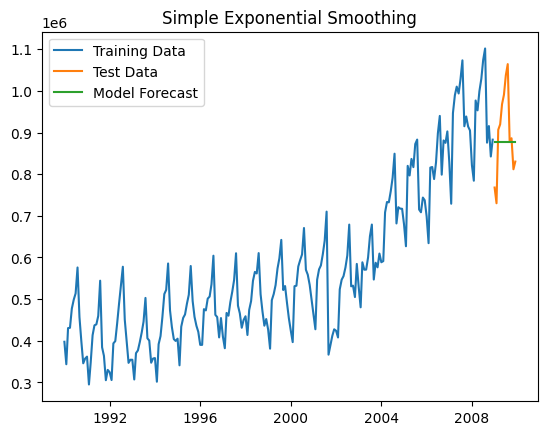

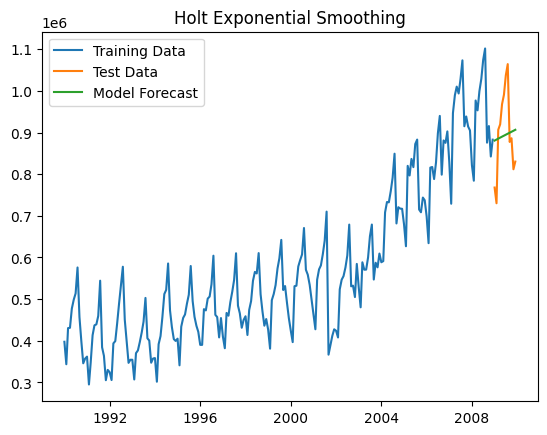

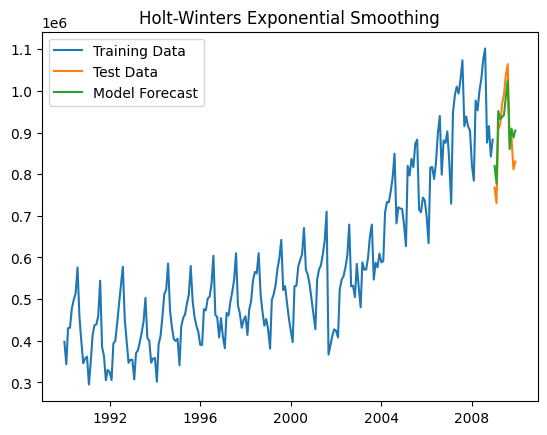

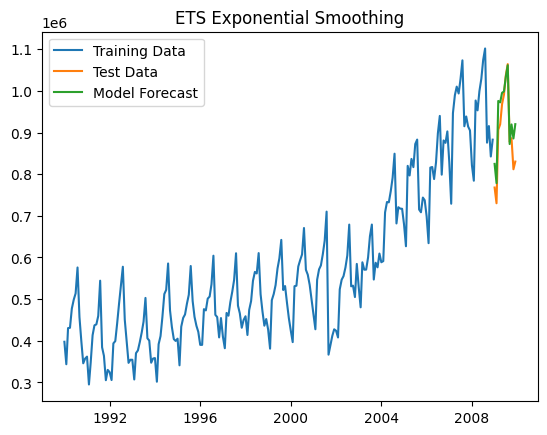

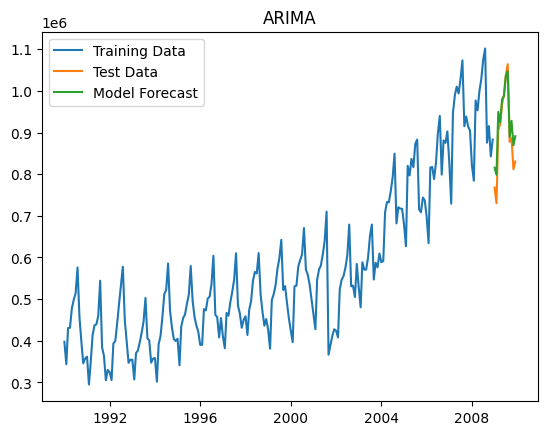

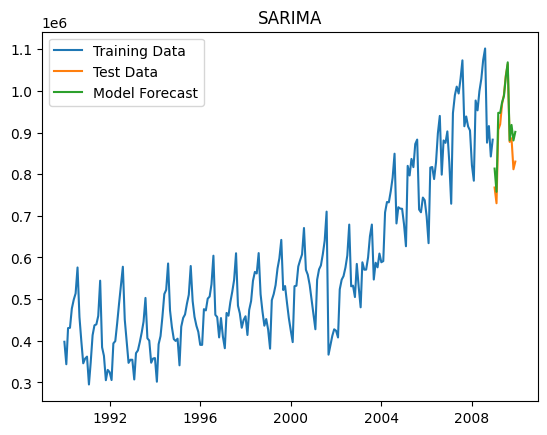

In [256]:
y.show('2009')

C:\Users\Dow\AppData\Local\Temp\ipykernel_22248\3466611483.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


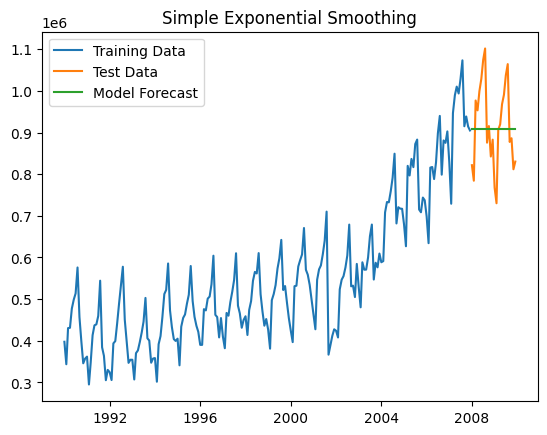

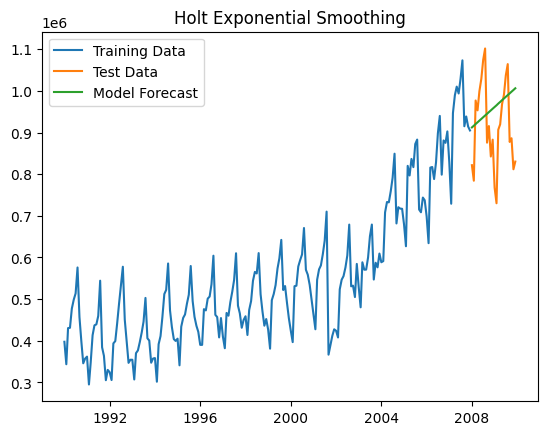

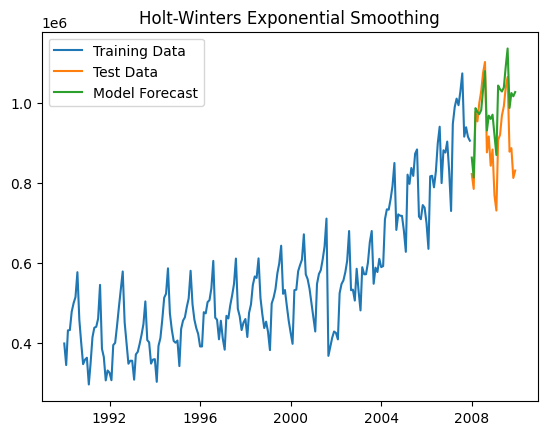

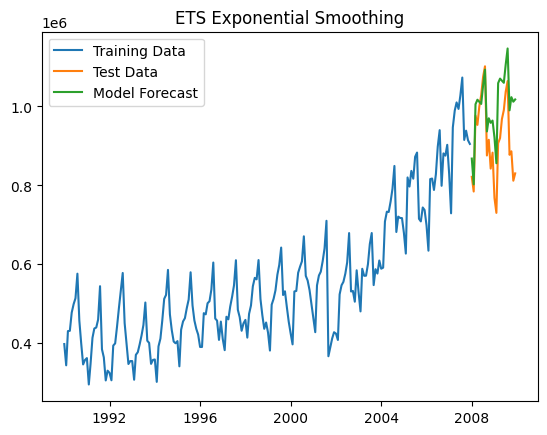

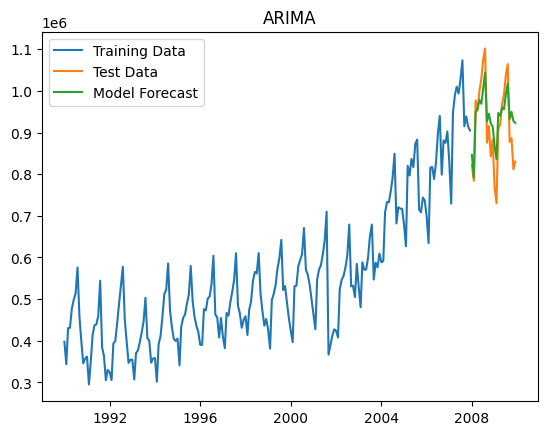

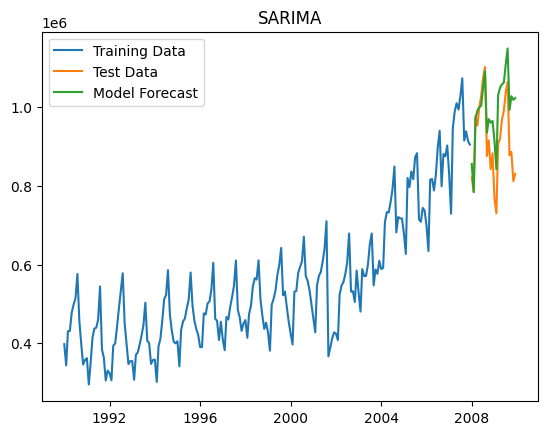

In [257]:
y.show('2008')

C:\Users\Dow\AppData\Local\Temp\ipykernel_22248\3466611483.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


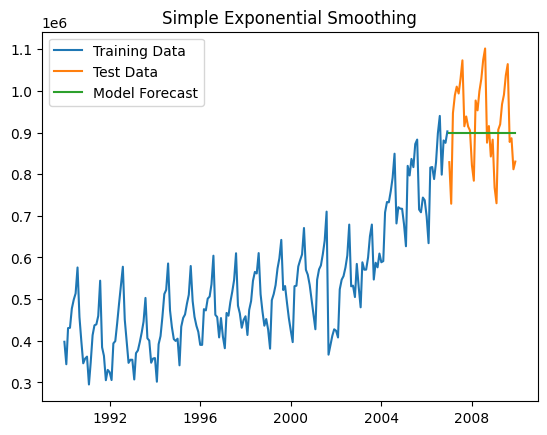

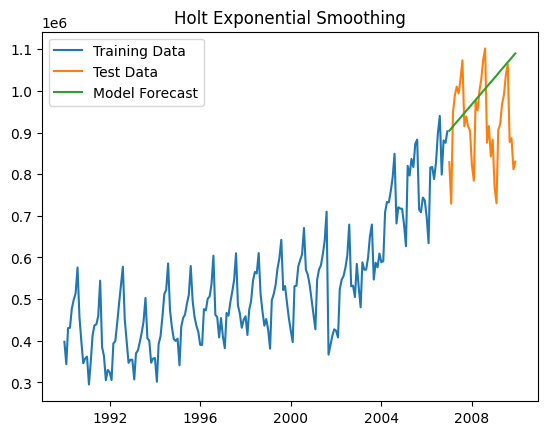

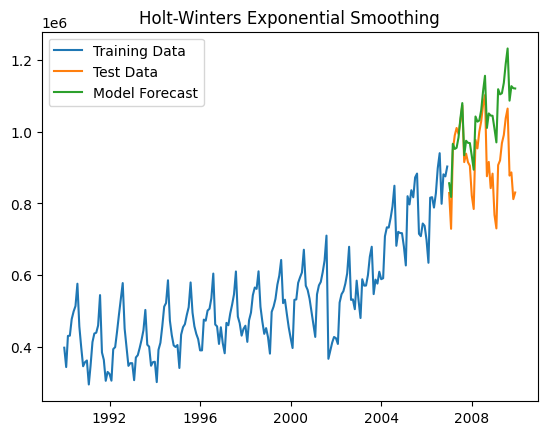

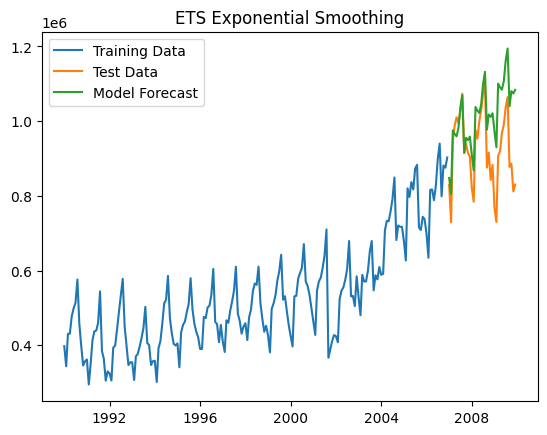

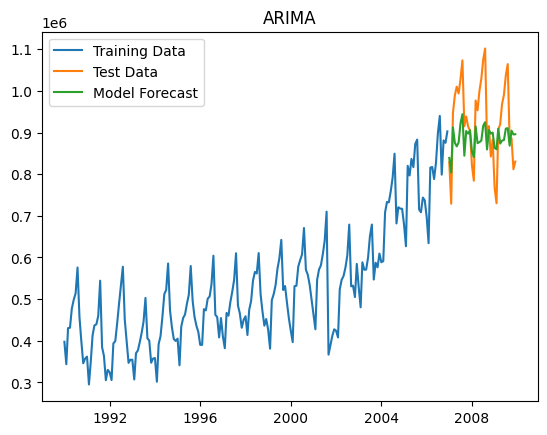

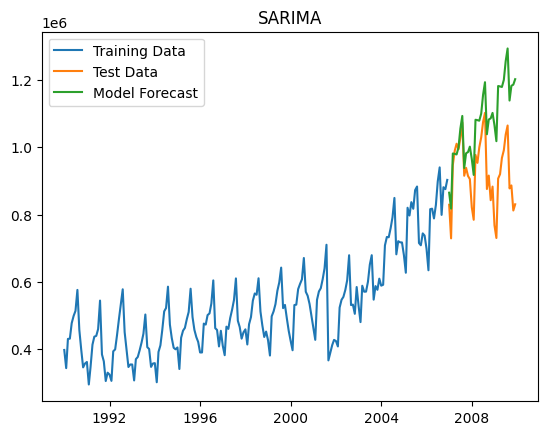

In [258]:
y.show('2007')

C:\Users\Dow\AppData\Local\Temp\ipykernel_22248\3466611483.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-XLovyRyR-py3.10\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dow\AppData\Local\pypoetry\Cache\virtualenvs\flights-

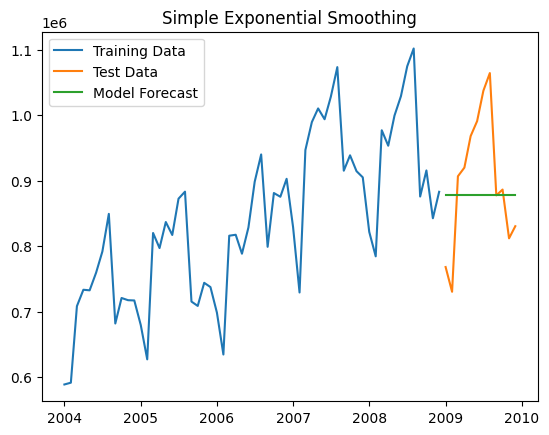

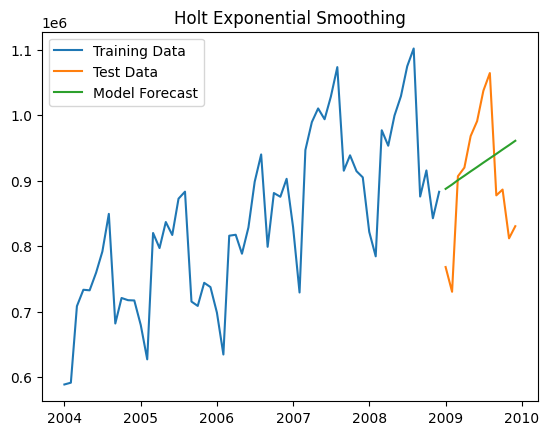

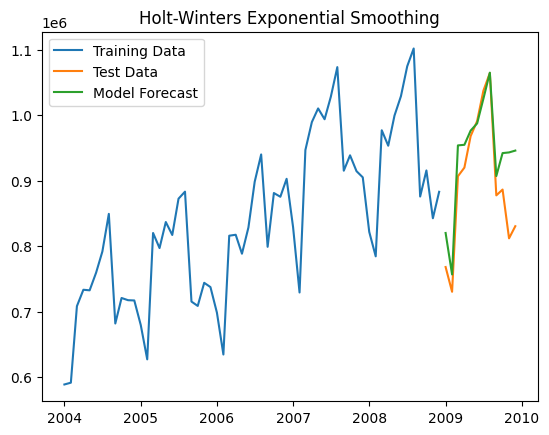

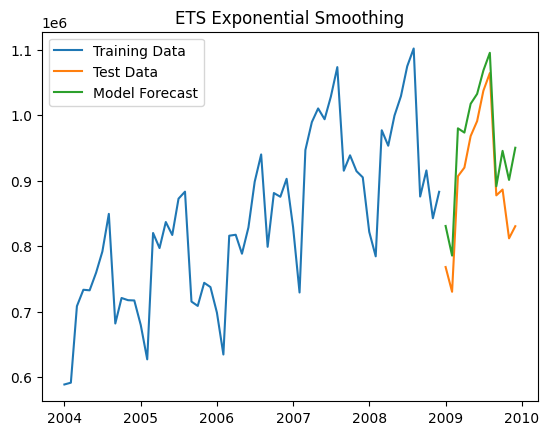

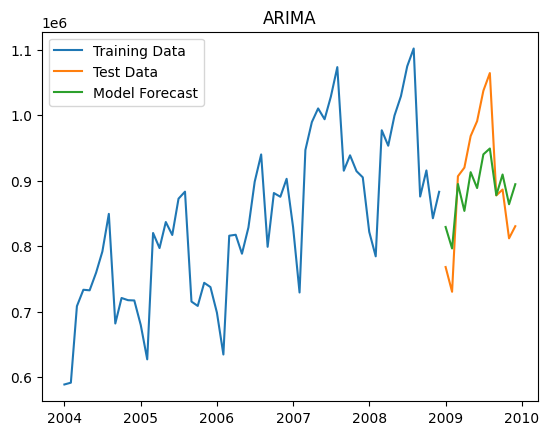

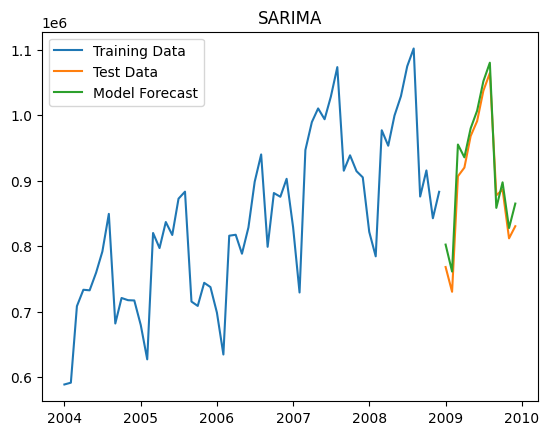

In [259]:
y.show('2009', '2004')

## Metrics